In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('medical_insurance.csv')

In [9]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [11]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


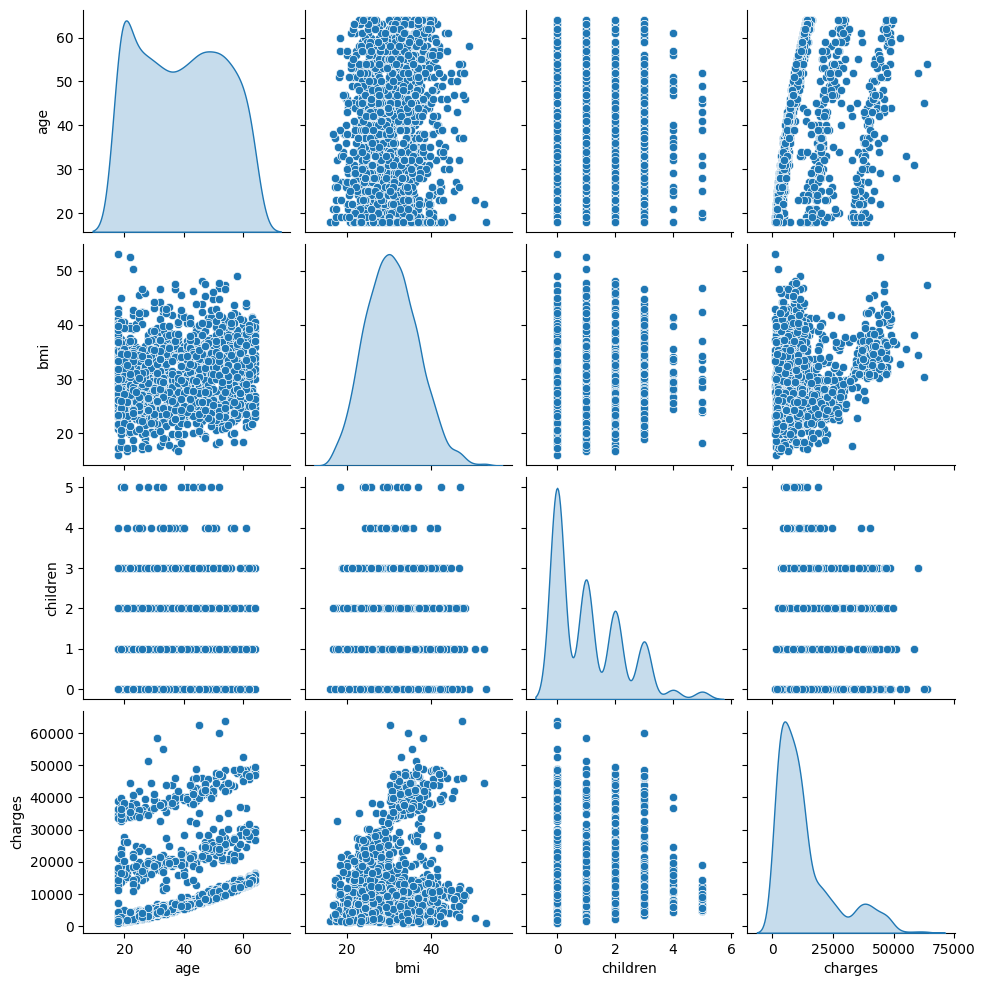

In [13]:
sns.pairplot(df, diag_kind='kde')

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()

In [17]:
df1 = df.copy()

In [19]:
df1['sex'] = le.fit_transform(df['sex'])
df1['smoker'] = le.fit_transform(df['smoker'])
df1['region'] = le.fit_transform(df['region'])
df[['sex', 'smoker', 'region']] = df1[['sex', 'smoker', 'region']]

In [20]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
2767,47,0,45.320,1,0,2,8569.86180
2768,21,0,34.600,0,0,3,2020.17700
2769,19,1,26.030,1,1,1,16450.89470
2770,23,1,18.715,0,0,1,21595.38229


<AxesSubplot:>

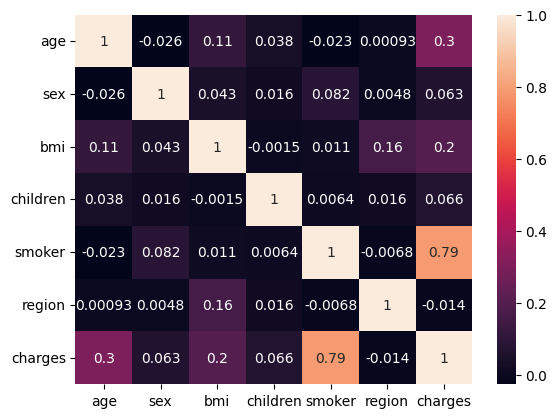

In [31]:
sns.heatmap(df.corr(),annot=True)

In [35]:
X = df.drop('charges',axis=1)
y = df['charges']

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
model = LinearRegression()

In [39]:
model.fit(X_train,y_train)

LinearRegression()

In [40]:
y_pred = model.predict(X_test)

In [41]:
from sklearn.metrics import mean_squared_error,r2_score

In [47]:
rmse = np.sqrt(mean_squared_error(y_pred,y_test))

In [48]:
rmse

6318.423803002623

In [49]:
r2_score(y_test,y_pred)

0.7398864322395977

In [50]:
from sklearn.tree import DecisionTreeRegressor

In [51]:
dt_model = DecisionTreeRegressor(random_state=42)

In [52]:
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [54]:
y_pred = dt_model.predict(X_test)

In [55]:
rmse2 = np.sqrt(mean_squared_error(y_test, dt_predictions))

In [56]:
rmse2

2937.9495165766784